## Data Exploration: Twitter

In [8]:
pip install chardet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from pivottablejs import pivot_ui
import seaborn as sns
import matplotlib.pyplot as plt
import chardet

In [2]:
from IPython.display import HTML

In [3]:
#Importing sample dataset used for initial exploration
df = pd.read_excel('2022-04-01-to-2022-06-25-daily-bprhjxlxixog_With_Model.xlsx')

#Importing all the new datasets 
df_10_12_2020=pd.read_excel('Oct-2020 - Dec-2020.xlsx')
df_04_06_2020=pd.read_excel('Apr-2020 - Jun-2020.xlsx')
df_02_04_2021= pd.read_excel('Feb-2021 - Apr-2021.xlsx')
df_06_08_2021= pd.read_excel('Jun-2021 - Aug-2021.xlsx')
df_04_09_2022=pd.read_excel('Apr-2022 - Sep-2022.xlsx')



/Users/nathanielthomascopeland/miniconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/nathanielthomascopeland/miniconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/nathanielthomascopeland/miniconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/nathanielthomascopeland/miniconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's defaul

In [4]:
df.shape

(4467, 24)

In [5]:
datasets= [df_10_12_2020, df_04_06_2020, df_02_04_2021, df_06_08_2021, df_04_09_2022]
for d in datasets:
    print(d.shape)

(1840, 19)
(637, 19)
(4539, 19)
(1380, 19)
(4467, 23)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Time period           4467 non-null   datetime64[ns]
 1   Placement             4467 non-null   object        
 2   Ad name               4467 non-null   object        
 3   Tweet Text            4467 non-null   object        
 4   Campaign ID           4467 non-null   object        
 5   Ad Group ID           4467 non-null   object        
 6   Tweet status          4467 non-null   object        
 7   Ad Group name         4467 non-null   object        
 8   Campaign name         4467 non-null   object        
 9   Impressions           4467 non-null   int64         
 10  Spend                 4467 non-null   float64       
 11  Clicks                4467 non-null   int64         
 12  Tweet engagements     4467 non-null   int64         
 13  Video played 25%  

In [7]:
df.describe()

Impressions        Spend       Clicks  Tweet engagements  \
count    4467.000000  4467.000000  4467.000000        4467.000000   
mean     6723.337811    12.200131    40.777032         194.793150   
std     33154.944940    53.463985   191.073725        2121.867343   
min         0.000000     0.000000     0.000000           0.000000   
25%         0.000000     0.000000     0.000000           0.000000   
50%         0.000000     0.000000     0.000000           0.000000   
75%         0.000000     0.000000     0.000000           0.000000   
max    488056.000000   774.794379  2545.000000       57255.000000   

       Video played 25%  Video played 50%  Video played 75%  \
count       4467.000000       4467.000000       4467.000000   
mean        1894.307141        989.479516        602.074099   
std        14433.845823       8017.724882       5134.858491   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000   
max       290024.000000     163736.000000     107114.000000   

       Video completions    Video views  Cost Per Result        Likes  
count        4467.000000    4467.000000      4467.000000  4467.000000  
mean          405.754645    1836.653906         0.141798     1.145288  
std          3587.533303   11266.480280         0.556272     7.342536  
min             0.000000       0.000000         0.000000     0.000000  
25%             0.000000       0.000000         0.000000     0.000000  
50%             0.000000       0.000000         0.000000     0.000000  
75%             0.000000       0.000000         0.000000     0.000000  
max         76351.000000  194594.000000         7.901110   184.000000

In [8]:
df.isna().sum()

Time period               0
Placement                 0
Ad name                   0
Tweet Text                0
Campaign ID               0
Ad Group ID               0
Tweet status              0
Ad Group name             0
Campaign name             0
Impressions               0
Spend                     0
Clicks                    0
Tweet engagements         0
Video played 25%          0
Video played 50%          0
Video played 75%          0
Video completions         0
Video views               0
Cost Per Result           0
Cost Per Result Type      0
Likes                     0
Replies                   0
Retweets                  0
Model                   105
dtype: int64

In [9]:
df['Time period'].nunique()

183

In [10]:
#sort the data according to Time Period
df = df.sort_values('Time period')

# Reset the indexes
df = df.reset_index(drop=True)

# Display the sorted and reset DataFrame
df

Time period Placement                          Ad name  \
0     2022-04-01       All  VIDEO_New GLC - Exterior_GCC_AR   
1     2022-04-01       All  Video_C-Class_Connection_DXB_AR   
2     2022-04-01       All  Video_C-Class_Connection_KWT_AR   
3     2022-04-01       All     Video_C-Class_Comfort_KWT_AR   
4     2022-04-01       All     Video_C-Class_Control_KWT_AR   
...          ...       ...                              ...   
4462  2022-09-30       All                      Untitled ad   
4463  2022-09-30       All                      Untitled ad   
4464  2022-09-30       All                      Untitled ad   
4465  2022-09-30       All                      Untitled ad   
4466  2022-09-30       All                      Untitled ad   

                                             Tweet Text Campaign ID  \
0     سيارة GLC الجديدة مع هيكل أطول بـ 6 سم. أناقة ...   i30145207   
1     استرح من الضوضاء وتواصل مع كل ما يهمك مع الفئة...   i29700596   
2     استرح من الضوضاء وتواصل مع كل ما يهمك مع الفئة...   i29700645   
3     ابتعد عن الضوضاء وضع نفسك وراحتك أولاً برفاهية...   i29700645   
4     سيطر على صخب الحياة وتحكّم بكل ثقة مع الفئة C ...   i29700645   
...                                                 ...         ...   
4462  جريئة ,قوية وتلفت الأنظار. هذه سيارة Mercedes-...   i31149639   
4463  جريئة ,قوية وتلفت الأنظار. هذه سيارة Mercedes-...   i31149639   
4464  جريئة ,قوية وتلفت الأنظار. هذه سيارة Mercedes-...   i31149639   
4465  جريئة ,قوية وتلفت الأنظار. هذه سيارة Mercedes-...   i31149639   
4466  جريئة ,قوية وتلفت الأنظار. هذه سيارة Mercedes-...   i31149639   

     Ad Group ID Tweet status                                   Ad Group name  \
0      i38017089      Expired  Twitter_VIEWS_2SECV_LPRM_BEHVR+INT_TWAP_GCC_AR   
1      i37453509      Expired  Twitter_TRAFF_LNKCL_LPRM_BEHVR+INT_TWAP_DXB_AR   
2      i37453571      Expired  Twitter_TRAFF_LNKCL_LPRM_BEHVR+INT_TWAP_KWT_AR   
3      i37453571      Expired  Twitter_TRAFF_LNKCL_LPRM_BEHVR+INT_TWAP_KWT_AR   
4      i37453571      Expired  Twitter_TRAFF_LNKCL_LPRM_BEHVR+INT_TWAP_KWT_AR   
...          ...          ...                                             ...   
4462   i39286770      Expired  Twitter_VIEWS_2SECV_LPRM_BEHVR+INT_TWAP_KWT_AR   
4463   i39286769      Expired  Twitter_VIEWS_2SECV_LPRM_BEHVR+INT_TWAP_BHR_AR   
4464   i39286768      Expired  Twitter_VIEWS_2SECV_LPRM_BEHVR+INT_TWAP_AUH_AR   
4465   i39286767      Expired  Twitter_VIEWS_2SECV_LPRM_BEHVR+INT_TWAP_DXB_AR   
4466   i39286228      Expired  Twitter_VIEWS_2SECV_LPRM_BEHVR+INT_TWAP_SAU_AR   

                                          Campaign name  Impressions  ...  \
0     PSGC_OVS_MULTI_STD-COU-GLC_AWRN_AOB_B.C.2022.B...            0  ...   
1     PSGC_OVS_DXB_STD-RNG-Cclass_CONS_ML_P.C.Cclass...            0  ...   
2     PSGC_OVS_KWT_STD-RNG-Cclass_CONS_ML_P.C.Cclass...            0  ...   
3     PSGC_OVS_KWT_STD-RNG-Cclass_CONS_ML_P.C.Cclass...            0  ...   
4     PSGC_OVS_KWT_STD-RNG-Cclass_CONS_ML_P.C.Cclass...            0  ...   
...                                                 ...          ...  ...   
4462   PSGC_OVS_MULTI_RNG_CONS_AOB_B.C.2022.Sustaina...            0  ...   
4463   PSGC_OVS_MULTI_RNG_CONS_AOB_B.C.2022.Sustaina...            0  ...   
4464   PSGC_OVS_MULTI_RNG_CONS_AOB_B.C.2022.Sustaina...            0  ...   
4465   PSGC_OVS_MULTI_RNG_CONS_AOB_B.C.2022.Sustaina...            0  ...   
4466   PSGC_OVS_MULTI_RNG_CONS_AOB_B.C.2022.Sustaina...            0  ...   

      Video played 50%  Video played 75%  Video completions  Video views  \
0                    0                 0                  0            0   
1                    0                 0                  0            0   
2                    0                 0                  0            0   
3                    0                 0                  0            0   
4                    0                 0                  0            0   
...                ...               ... 

In [11]:
df.dtypes

Time period             datetime64[ns]
Placement                       object
Ad name                         object
Tweet Text                      object
Campaign ID                     object
Ad Group ID                     object
Tweet status                    object
Ad Group name                   object
Campaign name                   object
Impressions                      int64
Spend                          float64
Clicks                           int64
Tweet engagements                int64
Video played 25%                 int64
Video played 50%                 int64
Video played 75%                 int64
Video completions                int64
Video views                      int64
Cost Per Result                float64
Cost Per Result Type            object
Likes                            int64
Replies                         object
Retweets                        object
Model                           object
dtype: object

In [12]:
pivot_ui(df, outfile_path='pivottablejs.html')
HTML('pivottablejs.html')


In [13]:
#Creation of phase column
#Extracting the phase column
phase=[]

for campaign_name in df['Campaign name']:
    if 'AWRN' in campaign_name:
        phase.append('Awareness')
    elif "CONS" in campaign_name:
        phase.append('Consideration')
    elif 'PRCH' in campaign_name or 'Decision' in item:
        phase.append('Decision')
    else:
        phase.append(None)

df['phase']=phase

In [14]:
pd.set_option('display.max_columns', None)
df

Time period Placement                          Ad name  \
0     2022-04-01       All  VIDEO_New GLC - Exterior_GCC_AR   
1     2022-04-01       All  Video_C-Class_Connection_DXB_AR   
2     2022-04-01       All  Video_C-Class_Connection_KWT_AR   
3     2022-04-01       All     Video_C-Class_Comfort_KWT_AR   
4     2022-04-01       All     Video_C-Class_Control_KWT_AR   
...          ...       ...                              ...   
4462  2022-09-30       All                      Untitled ad   
4463  2022-09-30       All                      Untitled ad   
4464  2022-09-30       All                      Untitled ad   
4465  2022-09-30       All                      Untitled ad   
4466  2022-09-30       All                      Untitled ad   

                                             Tweet Text Campaign ID  \
0     سيارة GLC الجديدة مع هيكل أطول بـ 6 سم. أناقة ...   i30145207   
1     استرح من الضوضاء وتواصل مع كل ما يهمك مع الفئة...   i29700596   
2     استرح من الضوضاء وتواصل مع كل ما يهمك مع الفئة...   i29700645   
3     ابتعد عن الضوضاء وضع نفسك وراحتك أولاً برفاهية...   i29700645   
4     سيطر على صخب الحياة وتحكّم بكل ثقة مع الفئة C ...   i29700645   
...                                                 ...         ...   
4462  جريئة ,قوية وتلفت الأنظار. هذه سيارة Mercedes-...   i31149639   
4463  جريئة ,قوية وتلفت الأنظار. هذه سيارة Mercedes-...   i31149639   
4464  جريئة ,قوية وتلفت الأنظار. هذه سيارة Mercedes-...   i31149639   
4465  جريئة ,قوية وتلفت الأنظار. هذه سيارة Mercedes-...   i31149639   
4466  جريئة ,قوية وتلفت الأنظار. هذه سيارة Mercedes-...   i31149639   

     Ad Group ID Tweet status                                   Ad Group name  \
0      i38017089      Expired  Twitter_VIEWS_2SECV_LPRM_BEHVR+INT_TWAP_GCC_AR   
1      i37453509      Expired  Twitter_TRAFF_LNKCL_LPRM_BEHVR+INT_TWAP_DXB_AR   
2      i37453571      Expired  Twitter_TRAFF_LNKCL_LPRM_BEHVR+INT_TWAP_KWT_AR   
3      i37453571      Expired  Twitter_TRAFF_LNKCL_LPRM_BEHVR+INT_TWAP_KWT_AR   
4      i37453571      Expired  Twitter_TRAFF_LNKCL_LPRM_BEHVR+INT_TWAP_KWT_AR   
...          ...          ...                                             ...   
4462   i39286770      Expired  Twitter_VIEWS_2SECV_LPRM_BEHVR+INT_TWAP_KWT_AR   
4463   i39286769      Expired  Twitter_VIEWS_2SECV_LPRM_BEHVR+INT_TWAP_BHR_AR   
4464   i39286768      Expired  Twitter_VIEWS_2SECV_LPRM_BEHVR+INT_TWAP_AUH_AR   
4465   i39286767      Expired  Twitter_VIEWS_2SECV_LPRM_BEHVR+INT_TWAP_DXB_AR   
4466   i39286228      Expired  Twitter_VIEWS_2SECV_LPRM_BEHVR+INT_TWAP_SAU_AR   

                                          Campaign name  Impressions  Spend  \
0     PSGC_OVS_MULTI_STD-COU-GLC_AWRN_AOB_B.C.2022.B...            0    0.0   
1     PSGC_OVS_DXB_STD-RNG-Cclass_CONS_ML_P.C.Cclass...            0    0.0   
2     PSGC_OVS_KWT_STD-RNG-Cclass_CONS_ML_P.C.Cclass...            0    0.0   
3     PSGC_OVS_KWT_STD-RNG-Cclass_CONS_ML_P.C.Cclass...            0    0.0   
4     PSGC_OVS_KWT_STD-RNG-Cclass_CONS_ML_P.C.Cclass...            0    0.0   
...                                                 ...          ...    ...   
4462   PSGC_OVS_MULTI_RNG_CONS_AOB_B.C.2022.Sustaina...            0    0.0   
4463   PSGC_OVS_MULTI_RNG_CONS_AOB_B.C.2022.Sustaina...            0    0.0   
4464   PSGC_OVS_MULTI_RNG_CONS_AOB_B.C.2022.Sustaina...            0    0.0   
4465   PSGC_OVS_MULTI_RNG_CONS_AOB_B.C.2022.Sustaina...            0    0.0   
4466   PSGC_OVS_MULTI_RNG_CONS_AOB_B.C.2022.Sustaina...            0    0.0   

      Clicks  Tweet engagements  Video played 25%  Video played 50%  \
0          0                  0                 0                 0   
1          0                  0                 0                 0   
2          0                  0                 0                 0   
3          0                  0                 0                 0   
4          0                  0                 0                 0   
...      ...                ...               .

In [15]:
df_no_zeroes= df[df['Spend'] != 0]
df_no_zeroes['Time period'].nunique()

102

## Creating the consolidated dataset

In [16]:
df_concat = pd.concat([df_10_12_2020, 
                       df_04_06_2020, 
                       df_02_04_2021, 
                       df_06_08_2021, 
                       df_04_09_2022
                ], ignore_index=True)
df_concat.shape

(12863, 25)

In [17]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12863 entries, 0 to 12862
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Time period           12863 non-null  datetime64[ns]
 1   Placement             12863 non-null  object        
 2   Ad Group name         12863 non-null  object        
 3   Objective             8396 non-null   object        
 4   Ad Group status       8396 non-null   object        
 5   Impressions           12863 non-null  int64         
 6   Spend                 12863 non-null  float64       
 7   Clicks                12863 non-null  int64         
 8   Tweet engagements     12863 non-null  int64         
 9   Video played 25%      12863 non-null  int64         
 10  Video played 50%      12863 non-null  int64         
 11  Video played 75%      12863 non-null  int64         
 12  Video completions     12863 non-null  int64         
 13  Video views     

In [18]:
#Extracting the phase of the data 

phase=[]

for index, row in df_concat.iterrows():
    if pd.notna(row['Objective']) and row['Objective'] == 'Website traffic':
        phase.append('Consideration')
    elif pd.notna(row['Objective']) and row['Objective'] in ['Reach', 'Pre-roll views', 'Video views']:
        phase.append('Awareness')
    elif pd.notna(row['Ad Group name']) and 'VIEWS' in row['Ad Group name']:
        phase.append('Awareness')
    elif pd.notna(row['Ad Group name']) and 'REACH' in row['Ad Group name']:
        phase.append('Awareness')
    elif pd.notna(row['Ad Group name']) and 'TRAFF' in row['Ad Group name']:
        phase.append('Consideration')
    else:
        phase.append(None)
df_concat['phase']=phase

df_concat['phase'].value_counts() 

Awareness        9207
Consideration    3656
Name: phase, dtype: int64

In [19]:
#Formatting the dates
df_concat['date']= df_concat['Time period'].astype('datetime64[ns]')
df_concat.sort_values(by='date')
df_concat.to_csv('df_concat.csv')

In [20]:
df_concat.columns

Index(['Time period', 'Placement', 'Ad Group name', 'Objective',
       'Ad Group status', 'Impressions', 'Spend', 'Clicks',
       'Tweet engagements', 'Video played 25%', 'Video played 50%',
       'Video played 75%', 'Video completions', 'Video views',
       'Cost Per Result', 'Cost Per Result Type', 'Likes', 'Replies',
       'Retweets', 'Ad name', 'Tweet Text', 'Campaign ID', 'Ad Group ID',
       'Tweet status', 'Campaign name', 'phase', 'date'],
      dtype='object')

In [21]:
#Keeping relevant columns only

df_concat=df_concat[['Impressions', 'Spend', 'Clicks', 'phase', 'date']]
df_concat.shape

(12863, 5)

In [22]:
mask_1 = df_concat['Impressions'] < df_concat['Clicks']
df_concat= df_concat[~mask_1]
mask_2 = (df_concat['Spend'] == 0) & (df_concat['Impressions'] > 0)
df_concat= df_concat[~mask_2]

df_concat.reset_index(drop=True, inplace=True)
df_concat.shape

(12844, 5)

## Simple distribution plotting + Box plotting

1.1. Spend (with all values and clearing values for which spend is zero) + according to phase for sample data

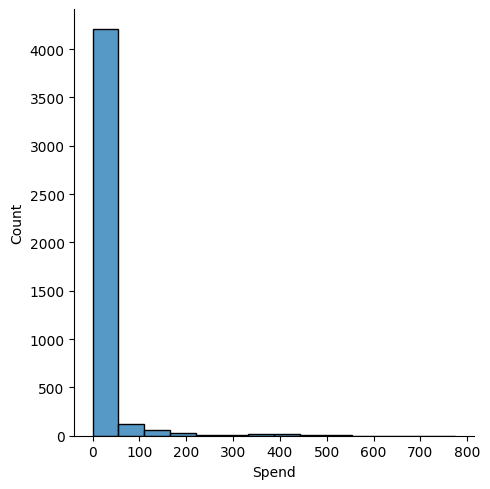

In [23]:
sns.displot(x=df['Spend'])

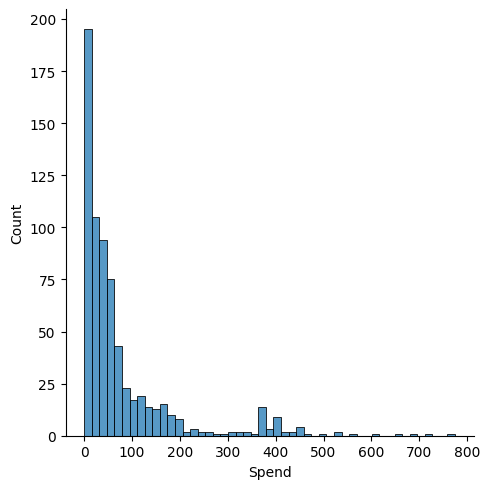

In [24]:
sns.displot(x=df_no_zeroes['Spend'])

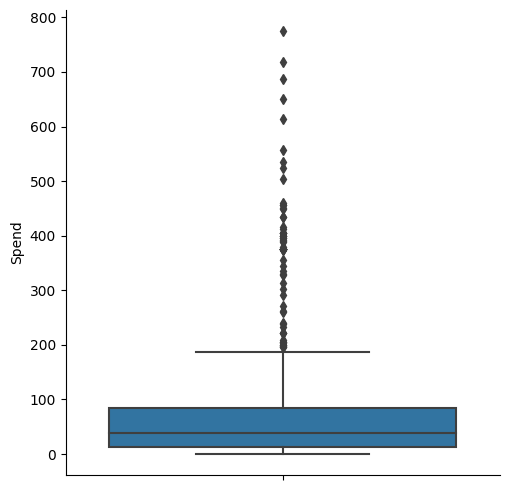

In [25]:
sns.catplot(y='Spend', kind='box', data=df_no_zeroes)

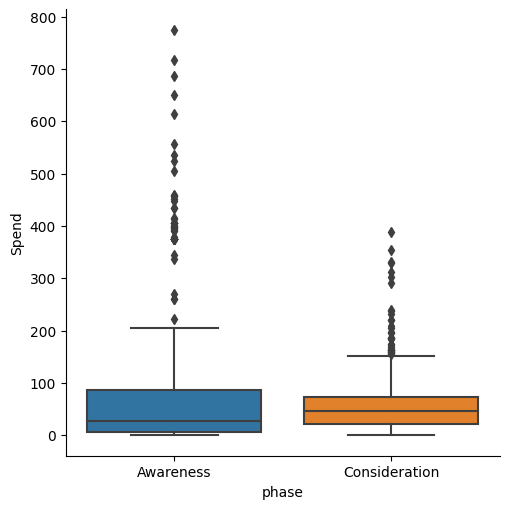

In [26]:
sns.catplot(x='phase', y='Spend', kind='box', data=df_no_zeroes)

1.1. Spend (with all values and clearing values for which spend is zero) + according to phase for concat data

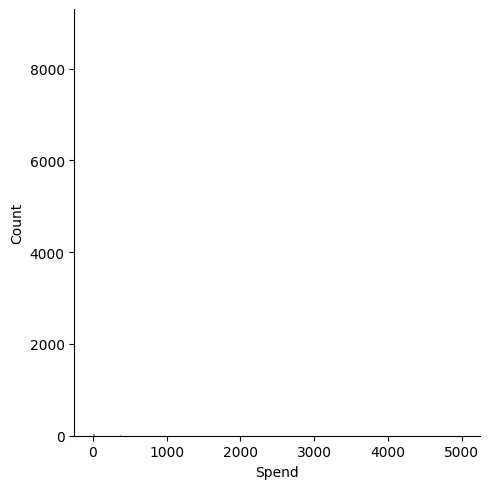

In [27]:
sns.displot(x=df_concat['Spend'])

In [28]:
df_concat['Spend'].describe()

count    12844.000000
mean        11.573318
std         61.138921
min          0.000000
25%          0.000000
50%          0.000000
75%          3.520802
max       5000.000000
Name: Spend, dtype: float64

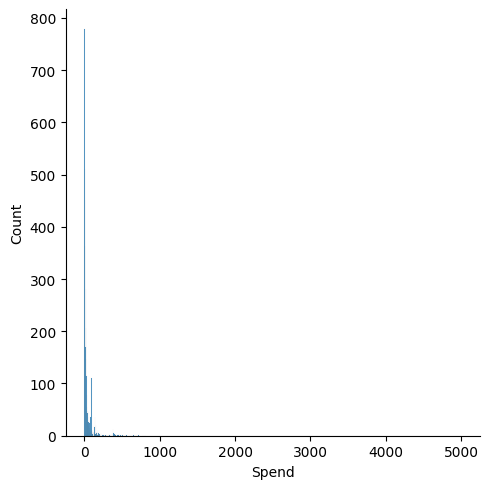

In [29]:

df_concat_no_zeroes = df_concat[df_concat['Spend']>0]

sns.displot(x=df_concat_no_zeroes['Spend'])

In [30]:
df_concat_no_zeroes['Spend'].describe()

count    4066.000000
mean       36.558705
std       104.384447
min         0.001250
25%         4.507607
50%        11.659236
75%        29.314012
max      5000.000000
Name: Spend, dtype: float64

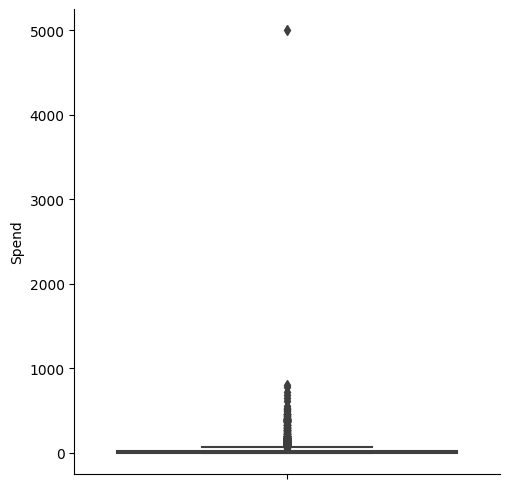

In [31]:
sns.catplot(y='Spend', kind='box', data=df_concat_no_zeroes)

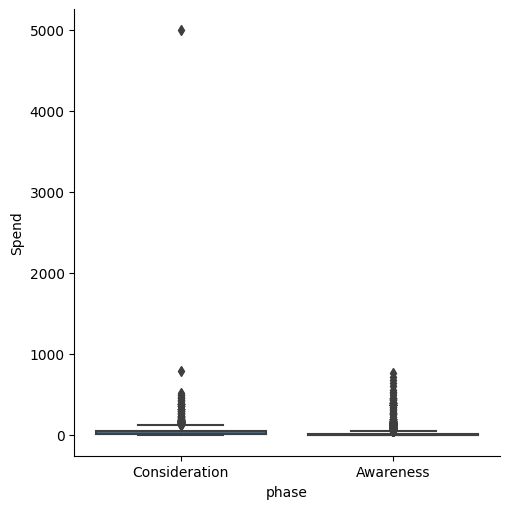

In [32]:
sns.catplot(x='phase', y='Spend', kind='box', data=df_concat_no_zeroes)

In [33]:
lst=['Consideration', 'Awareness']

for l in lst:

    print(df_concat_no_zeroes[df_concat_no_zeroes['phase']== l]['Spend'].describe())

count    1053.000000
mean       57.400808
std       171.629588
min         0.001250
25%        13.269536
50%        23.390964
75%        59.644236
max      5000.000000
Name: Spend, dtype: float64
count    3013.000000
mean       29.274690
std        64.900980
min         0.003846
25%         3.290535
50%         8.975516
75%        23.238708
max       774.794379
Name: Spend, dtype: float64


2.1 Impressions on normal sample dataset and sample dataset with no zero spend

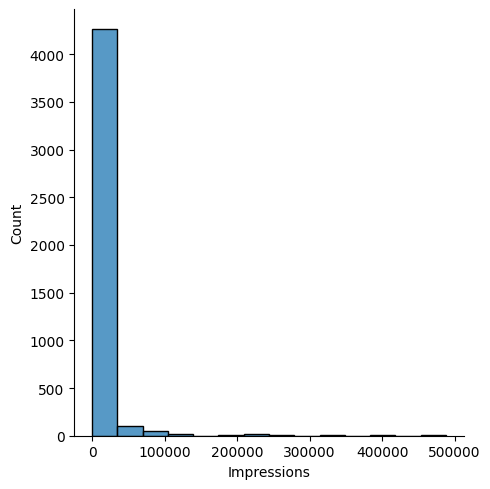

In [34]:
sns.displot(x=df['Impressions'])

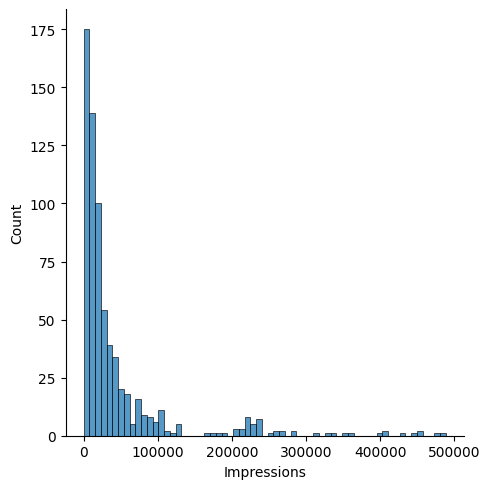

In [35]:
sns.displot(x=df_no_zeroes['Impressions'])

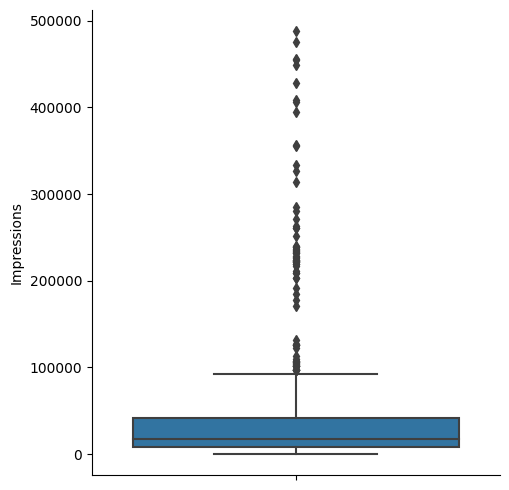

In [36]:
sns.catplot(y='Impressions', kind='box', data=df_no_zeroes)

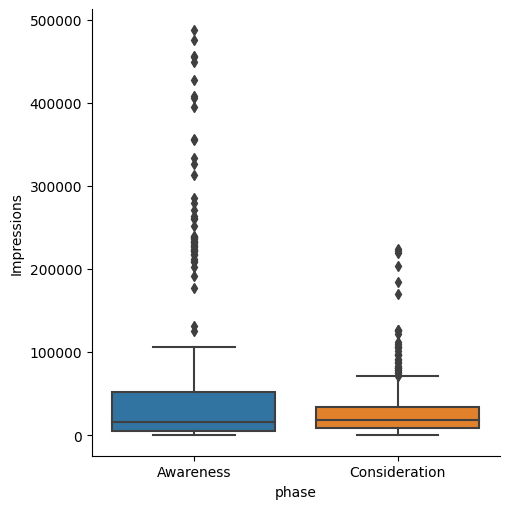

In [37]:
sns.catplot(x='phase', y='Impressions', kind='box', data=df_no_zeroes)

2.1 Impressions on normal total dataset and total dataset with no zero spend

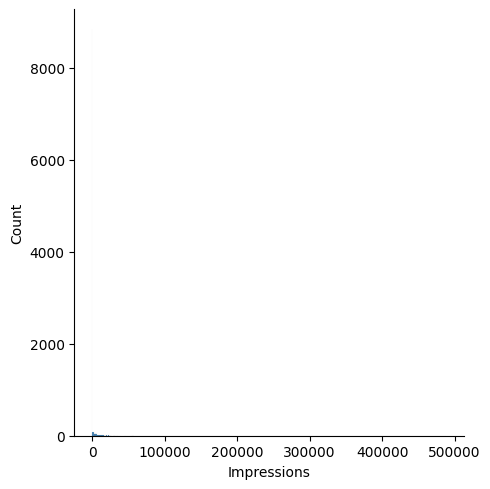

In [38]:
sns.displot(x=df_concat['Impressions'])

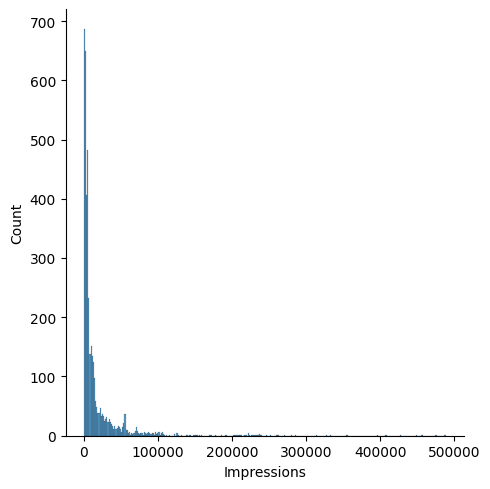

In [39]:
sns.displot(x=df_concat_no_zeroes['Impressions'])

In [40]:
df_concat_no_zeroes['Impressions'].describe()

count      4066.000000
mean      17226.973684
std       38475.150706
min           1.000000
25%        2228.500000
50%        5483.000000
75%       14409.500000
max      488056.000000
Name: Impressions, dtype: float64

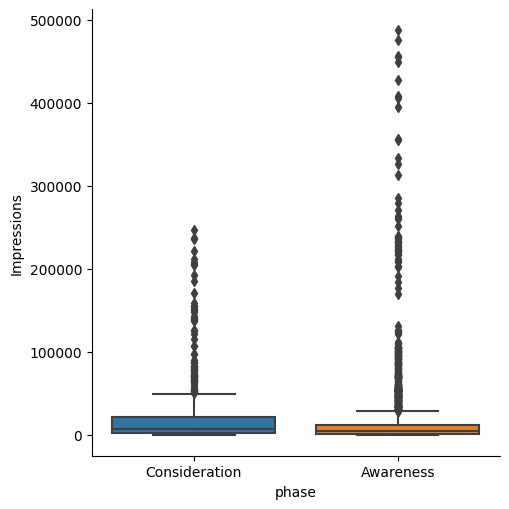

In [41]:
sns.catplot(x='phase', y='Impressions', kind='box', data=df_concat_no_zeroes)

In [42]:
lst=['Consideration', 'Awareness']

for l in lst:

    print(df_concat_no_zeroes[df_concat_no_zeroes['phase']== l]['Impressions'].describe())

count      1053.000000
mean      18455.717949
std       30656.112787
min          75.000000
25%        3452.000000
50%        7551.000000
75%       22170.000000
max      246855.000000
Name: Impressions, dtype: float64
count      3013.000000
mean      16797.545304
std       40852.301917
min           1.000000
25%        1944.000000
50%        5018.000000
75%       13023.000000
max      488056.000000
Name: Impressions, dtype: float64


3.1. Clicks (with all values and clearing values for which spend is zero) on sample data

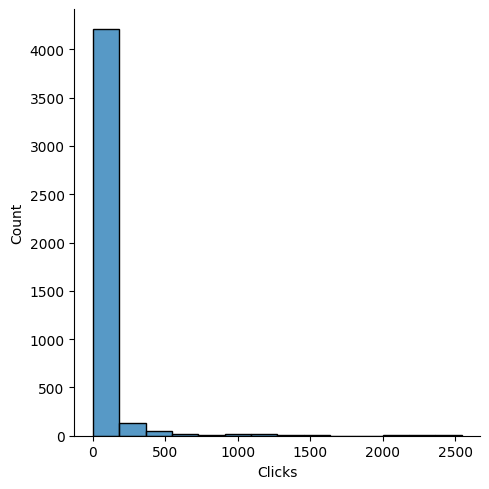

In [43]:
sns.displot(x=df['Clicks'])

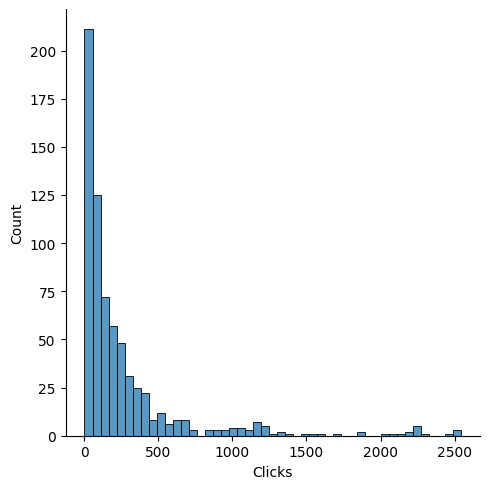

In [44]:
sns.displot(x=df_no_zeroes['Clicks'])

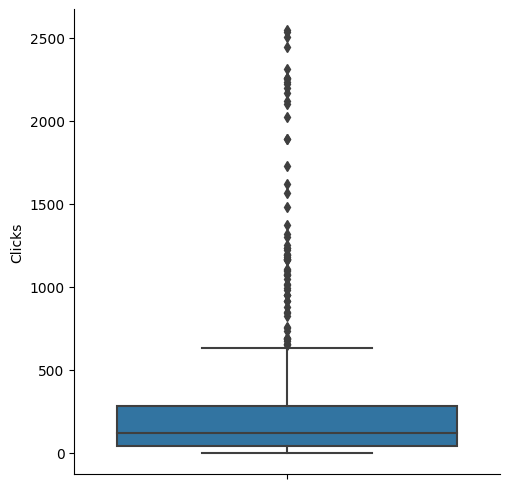

In [45]:
sns.catplot(y='Clicks', kind='box', data=df_no_zeroes)

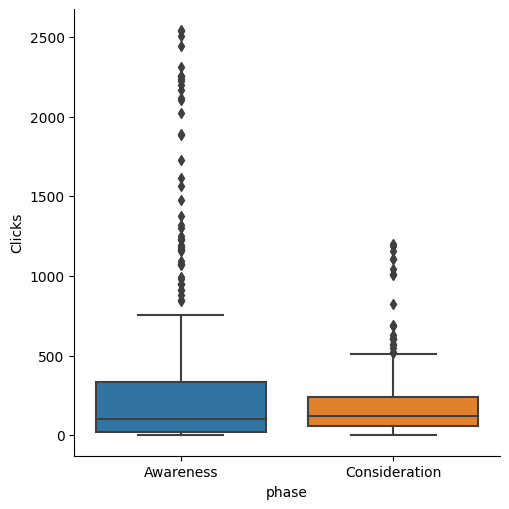

In [46]:
sns.catplot(x='phase', y='Clicks', kind='box', data=df_no_zeroes)

3.2. Clicks (with all values and clearing values for which spend is zero) on all data

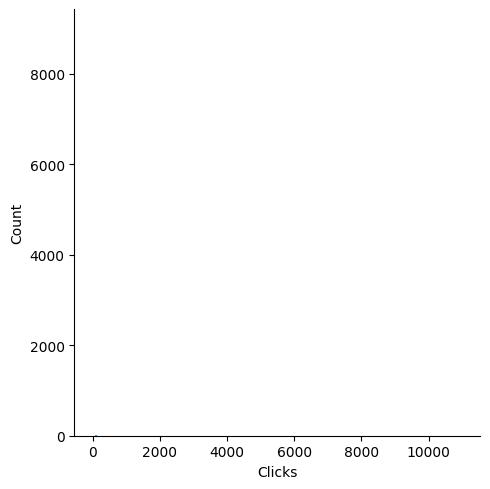

In [47]:
sns.displot(x=df_concat['Clicks'])

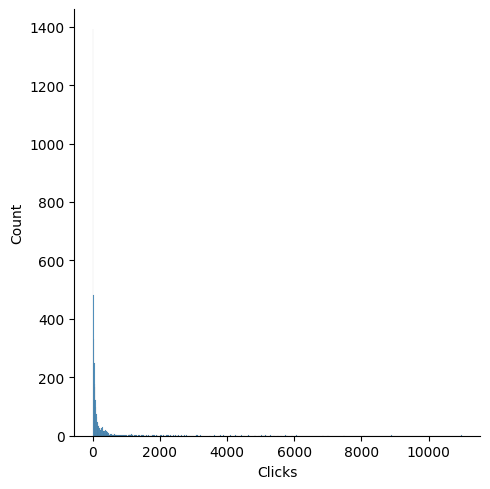

In [48]:
sns.displot(x=df_concat_no_zeroes['Clicks'])

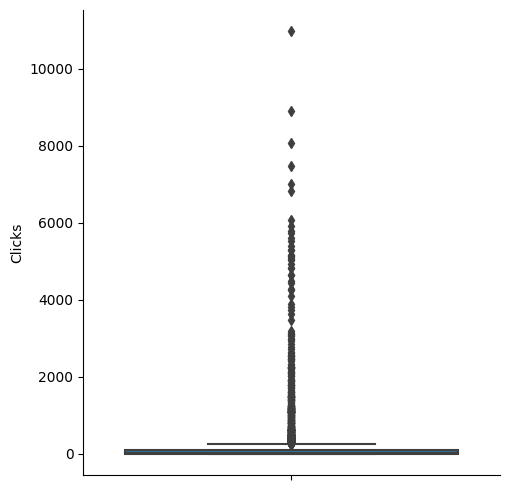

In [49]:
sns.catplot(y='Clicks', kind='box', data=df_concat_no_zeroes)

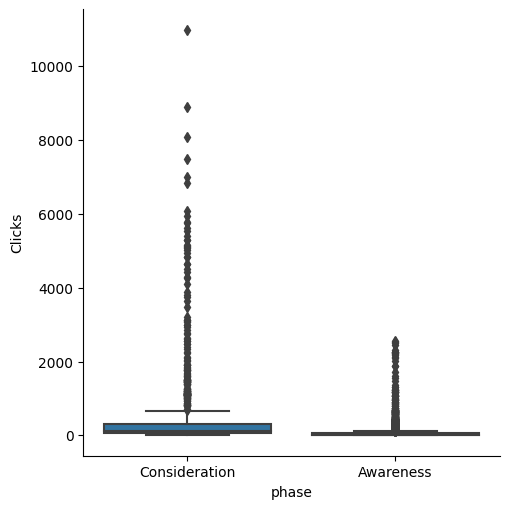

In [50]:
sns.catplot(x='phase', y='Clicks', kind='box', data=df_concat_no_zeroes)

In [51]:
lst=['Consideration', 'Awareness']

for l in lst:

    print(df_concat_no_zeroes[df_concat_no_zeroes['phase']== l]['Clicks'].describe())

count     1053.000000
mean       480.979107
std       1086.301362
min          0.000000
25%         57.000000
50%        119.000000
75%        305.000000
max      10981.000000
Name: Clicks, dtype: float64
count    3013.000000
mean       86.474610
std       234.293814
min         0.000000
25%         5.000000
50%        16.000000
75%        54.000000
max      2545.000000
Name: Clicks, dtype: float64


4. Summary sample data

In [52]:
df_no_zeroes[df_no_zeroes['phase']=='Awareness'].describe()

Impressions       Spend       Clicks  Tweet engagements  \
count     375.000000  375.000000   375.000000         375.000000   
mean    54770.528000   89.866581   326.690667        2083.117333   
std     93908.427946  143.452648   531.024562        7050.086479   
min        16.000000    0.010766     0.000000           0.000000   
25%      5491.500000    5.788350    21.000000          33.000000   
50%     16442.000000   27.813723   106.000000         441.000000   
75%     51670.500000   85.918671   333.500000        1561.500000   
max    488056.000000  774.794379  2545.000000       57255.000000   

       Video played 25%  Video played 50%  Video played 75%  \
count        375.000000        375.000000        375.000000   
mean       16135.333333       8673.584000       5376.813333   
std        46563.695135      26089.486885      16797.967780   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%          325.000000        105.000000         49.000000   
75%         4148.500000       1854.000000       1011.500000   
max       290024.000000     163736.000000     107114.000000   

       Video completions    Video views  Cost Per Result       Likes  
count         375.000000     375.000000       375.000000  375.000000  
mean         3668.101333   14416.421333         1.127154    9.773333  
std         11773.799159   34822.785408         1.410930   23.044002  
min             0.000000       0.000000         0.001538    0.000000  
25%             0.000000       0.000000         0.002404    0.000000  
50%            28.000000     327.000000         1.410846    3.000000  
75%           581.500000    6456.000000         1.687864   10.000000  
max         76351.000000  194594.000000         7.901110  184.000000

In [53]:
df_no_zeroes[df_no_zeroes['phase']=='Consideration'].describe()

Impressions       Spend       Clicks  Tweet engagements  \
count     318.000000  318.000000   318.000000         318.000000   
mean    29855.981132   65.402564   187.553459         279.786164   
std     35724.096926   65.145371   208.689335         334.703228   
min       105.000000    0.091792     0.000000           0.000000   
25%      9328.250000   21.752642    58.250000          84.000000   
50%     18009.000000   46.476874   124.500000         179.000000   
75%     34341.000000   74.291287   241.250000         332.750000   
max    224000.000000  389.039648  1198.000000        1968.000000   

       Video played 25%  Video played 50%  Video played 75%  \
count        318.000000        318.000000        318.000000   
mean        7582.138365       3671.103774       2116.855346   
std         7872.557141       3725.937121       2228.831655   
min           10.000000          1.000000          1.000000   
25%         2491.250000        865.250000        373.750000   
50%         5466.500000       2422.500000       1369.500000   
75%         9628.750000       5341.750000       3157.000000   
max        49417.000000      18193.000000      10750.000000   

       Video completions   Video views  Cost Per Result       Likes  
count         318.000000    318.000000       318.000000  318.000000  
mean         1374.113208   8799.292453         0.662665    4.562893  
std          1511.056809   9034.144844         0.592184    4.199385  
min             0.000000     27.000000         0.000000    0.000000  
25%           194.750000   2818.250000         0.259535    2.000000  
50%           826.000000   6689.000000         0.563113    4.000000  
75%          2017.750000  10616.000000         0.993223    6.000000  
max          7447.000000  57299.000000         3.365761   29.000000

## Simple Scatter plotting:

1. Sample data

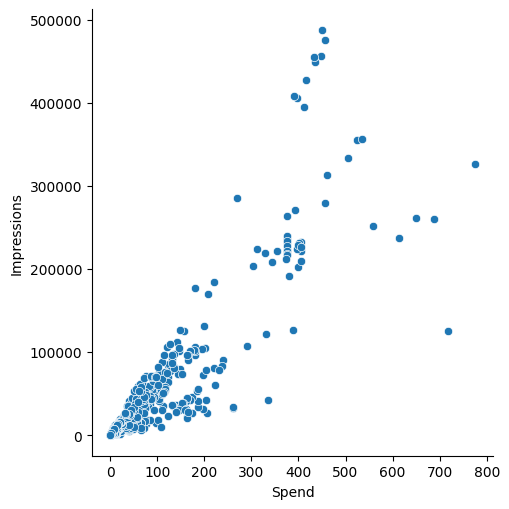

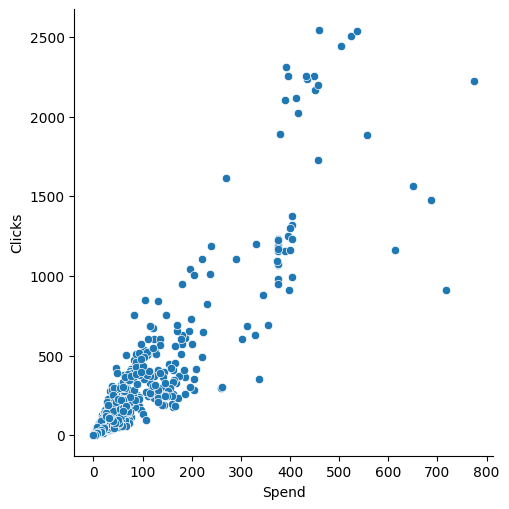

In [54]:
cols=['Impressions', 'Clicks']
for c in cols:
    sns.relplot(x='Spend', y=c, kind='scatter', data=df_no_zeroes)
    plt.show()

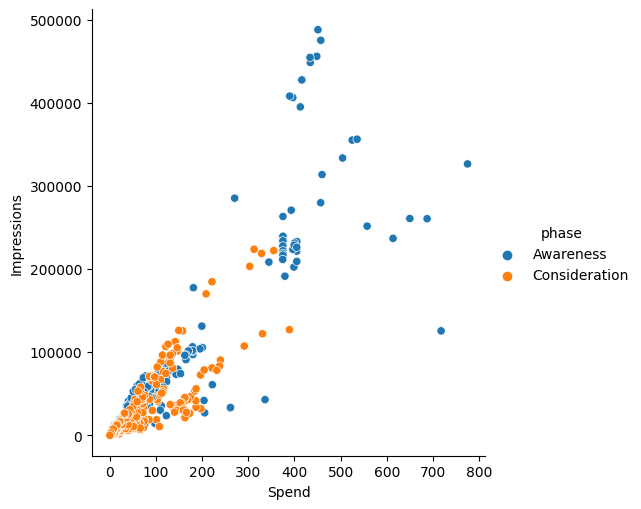

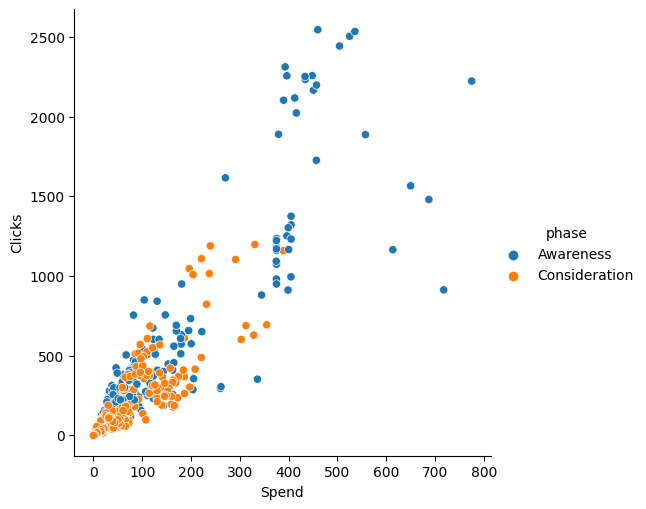

In [55]:
cols=['Impressions', 'Clicks']
for c in cols:
    sns.relplot(x='Spend', y=c, kind='scatter', hue='phase', data=df_no_zeroes)
    plt.show()

2. Full data

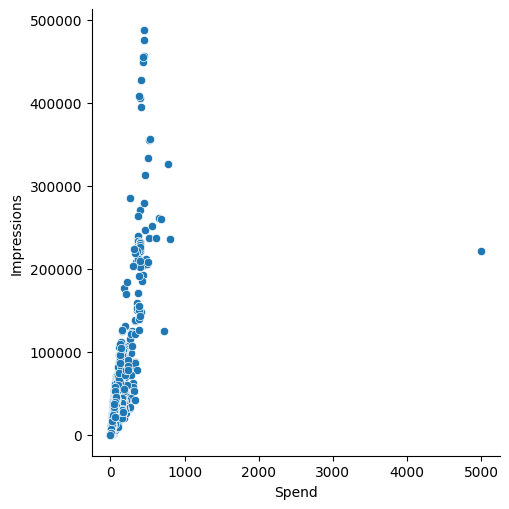

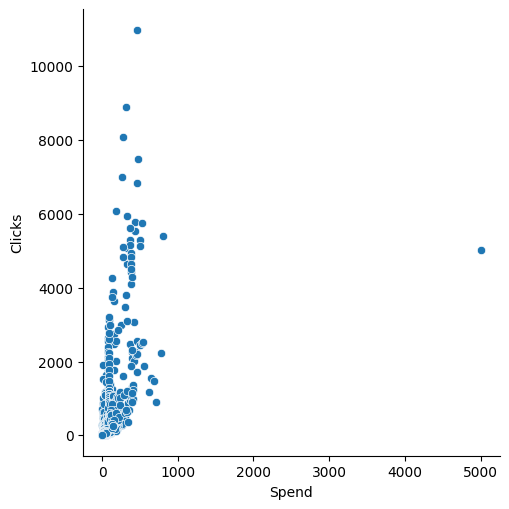

In [56]:
cols=['Impressions', 'Clicks']
for c in cols:
    sns.relplot(x='Spend', y=c, kind='scatter', data=df_concat_no_zeroes)
    plt.show()

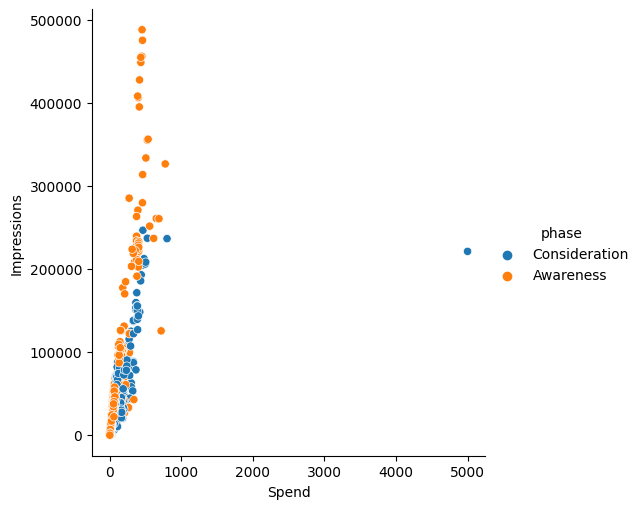

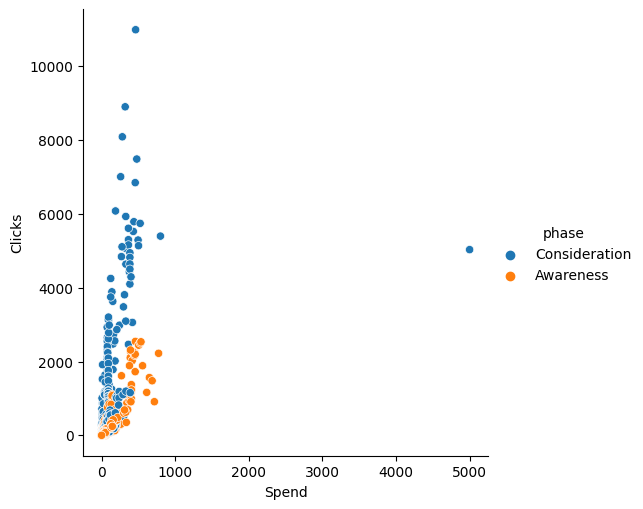

In [57]:
cols=['Impressions', 'Clicks']
for c in cols:
    sns.relplot(x='Spend', y=c, kind='scatter', hue='phase', data=df_concat_no_zeroes)
    plt.show()

## Correlation plotting

1. Sample data

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_69575/937001669.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


NameError: name 'k' is not defined

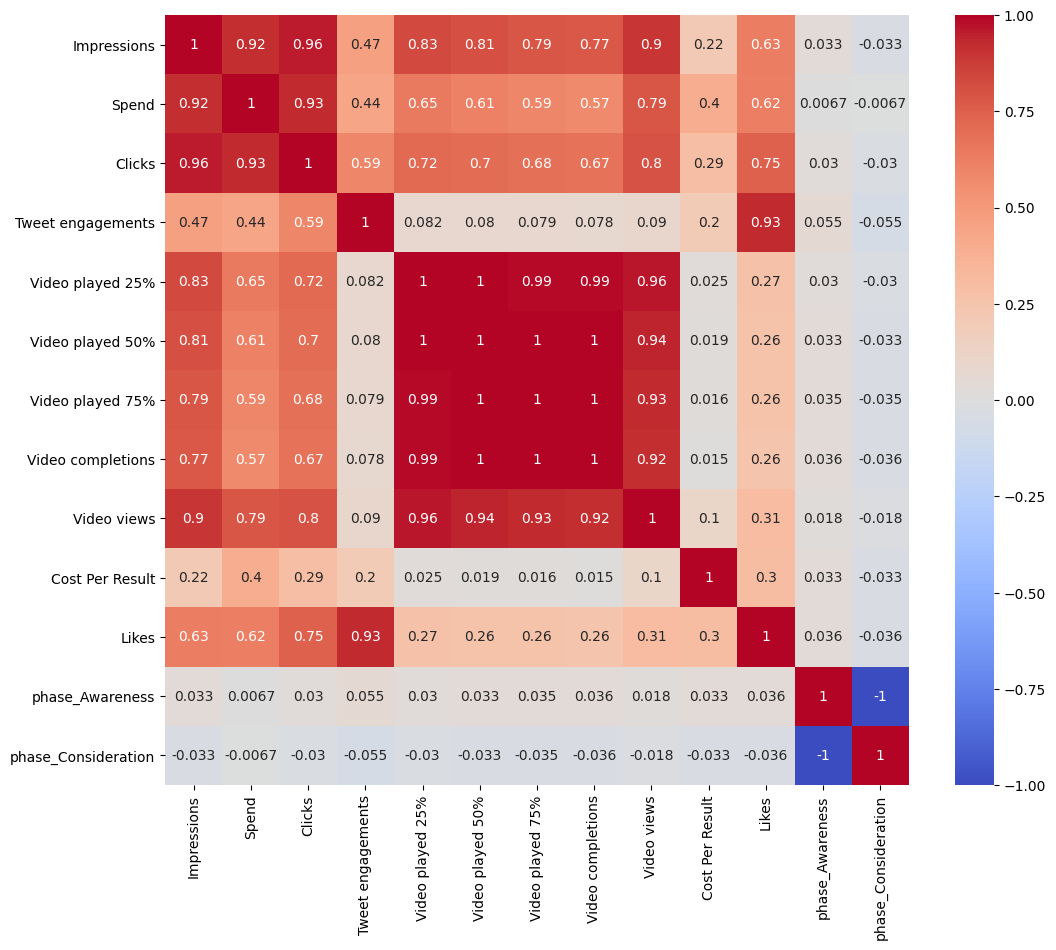

In [58]:
phases= pd.get_dummies(df['phase'], prefix='phase')
df= pd.concat([df, phases], axis=1)

correlation_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Top {} Features)'.format(k))
plt.show()

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_69575/3033874734.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


NameError: name 'k' is not defined

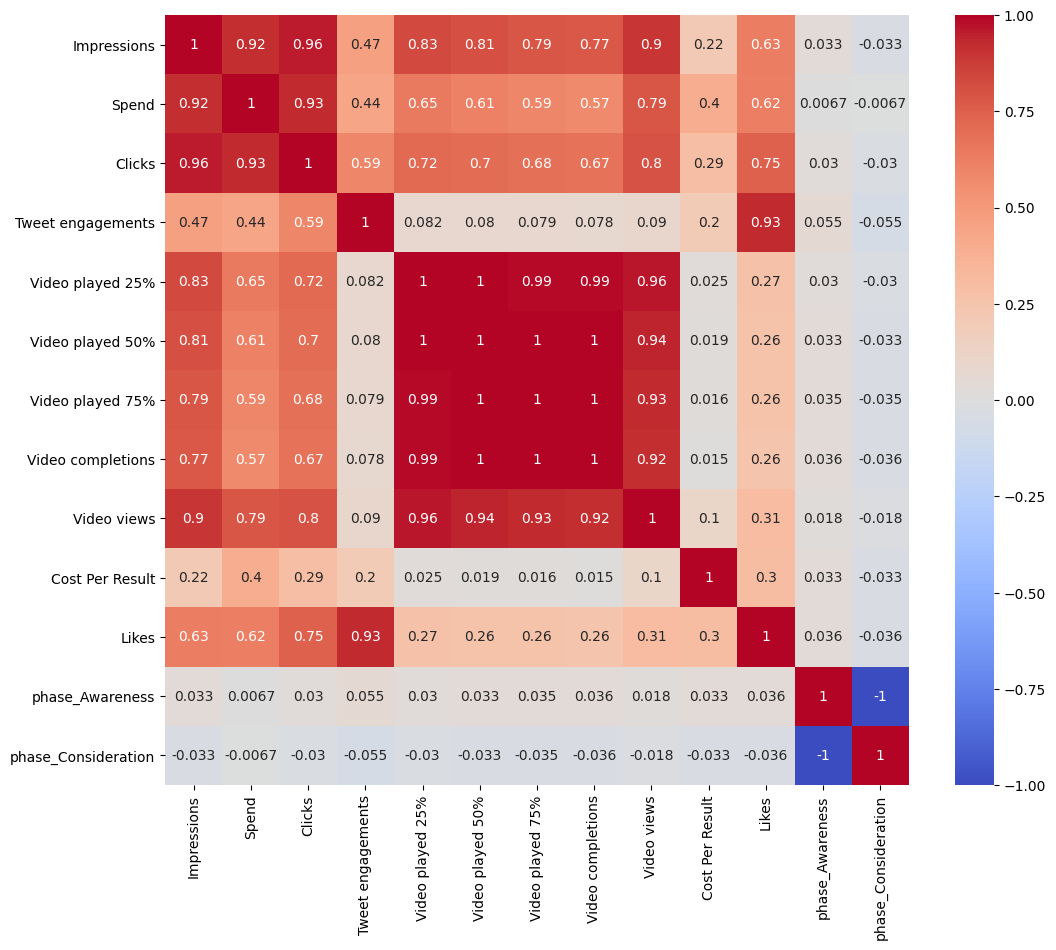

In [60]:
df_no_zeroes= pd.concat([df_no_zeroes, phases], axis=1)

correlation_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Top {} Features)'.format(k))
plt.show()

2. Full dataset

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_69575/382100633.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_concat.corr()


NameError: name 'k' is not defined

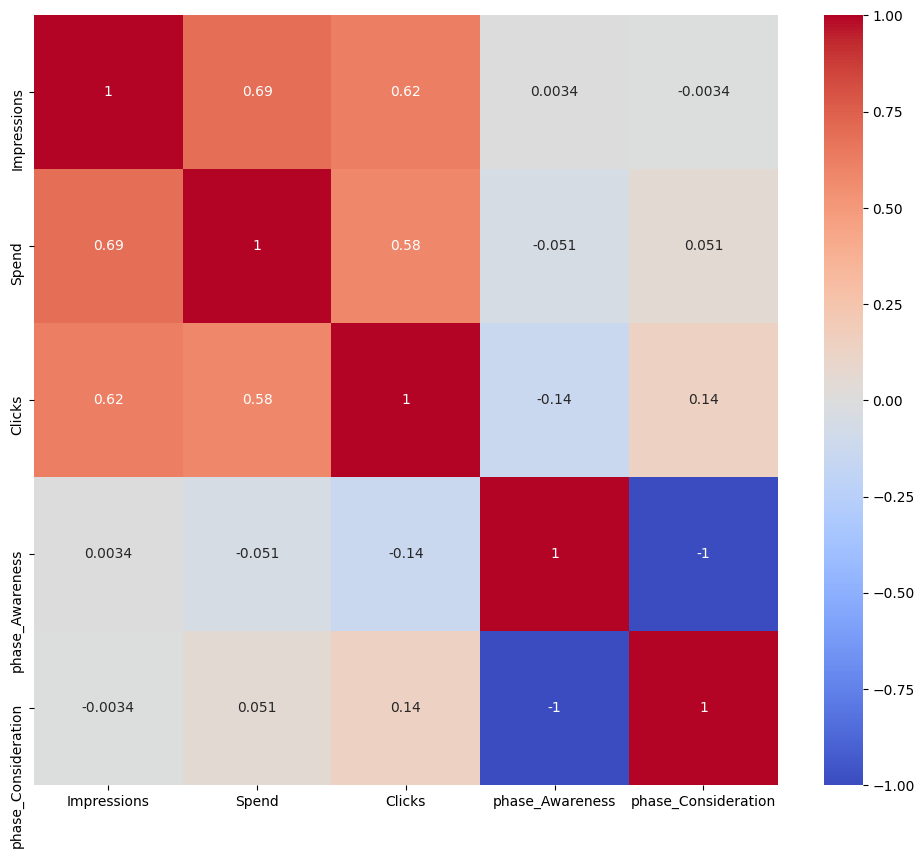

In [61]:
phases= pd.get_dummies(df_concat['phase'], prefix='phase')
df_concat= pd.concat([df_concat, phases], axis=1)

correlation_matrix = df_concat.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Top {} Features)'.format(k))
plt.show()

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_69575/4002266928.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_concat_no_zeroes.corr()


NameError: name 'k' is not defined

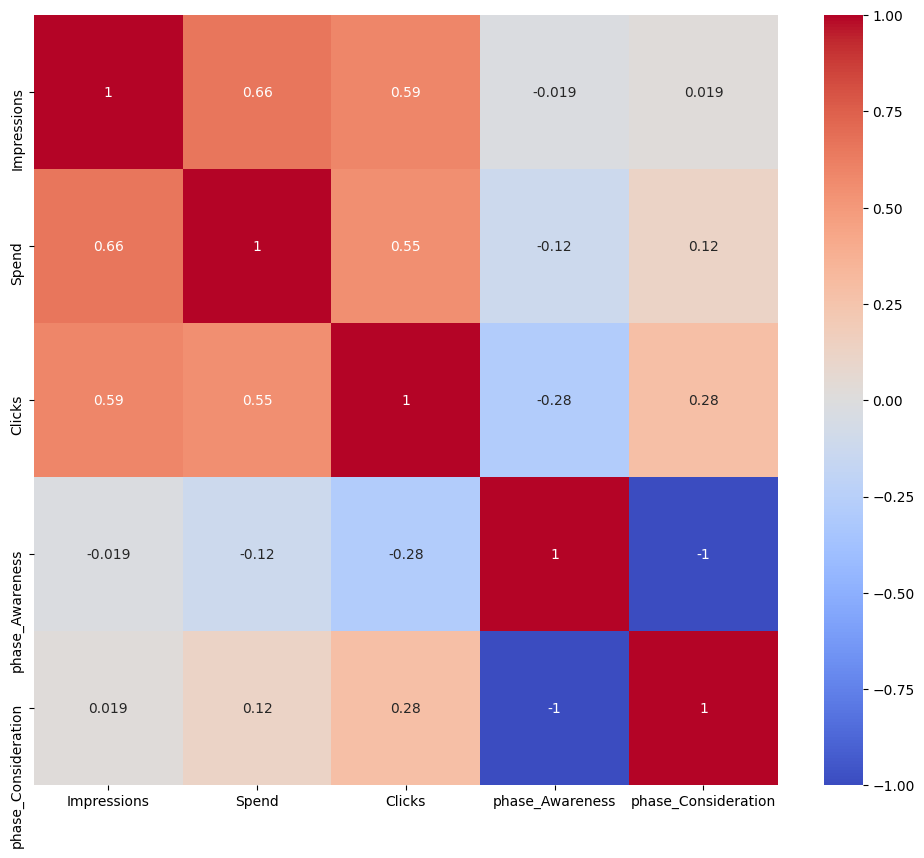

In [62]:
df_concat_no_zeroes= pd.concat([df_concat_no_zeroes, phases], axis=1)

correlation_matrix = df_concat_no_zeroes.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Top {} Features)'.format(k))
plt.show()

## Line charts according to time

1. Spend, Clicks, Impressions according to time for sample

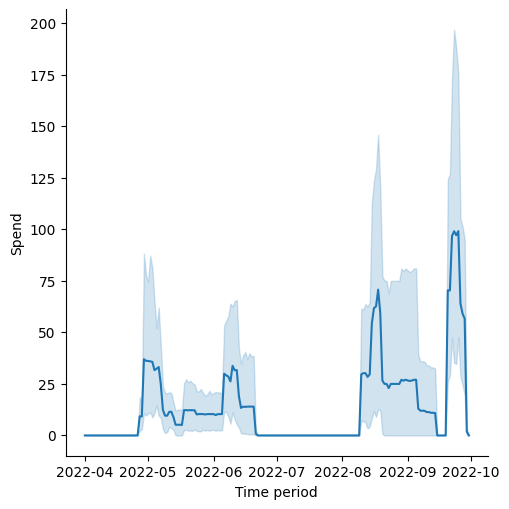

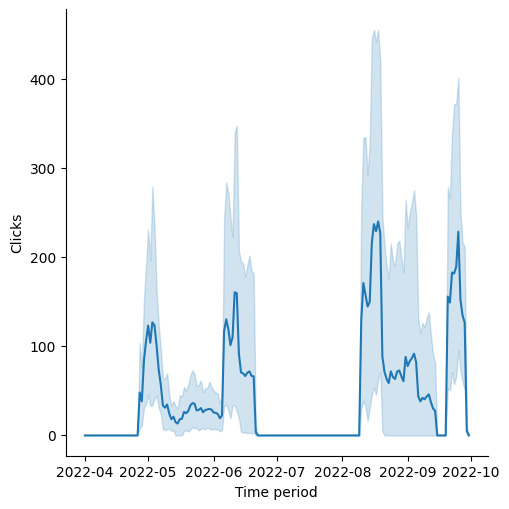

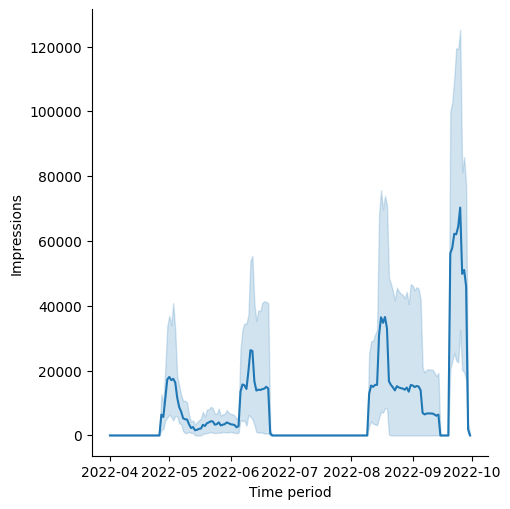

In [63]:
columns=['Spend', 'Clicks', 'Impressions']
for c in columns:
    sns.relplot(x='Time period', y=c, data=df, kind='line')

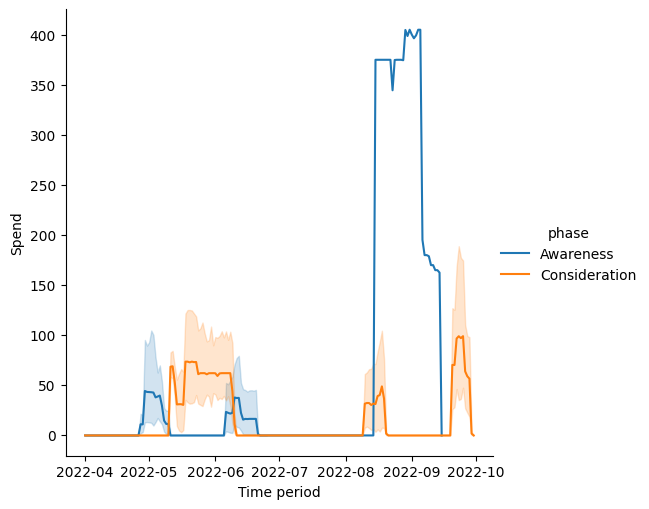

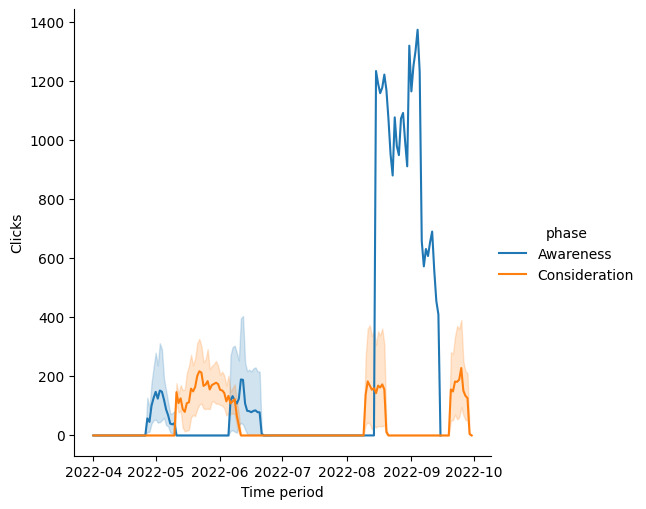

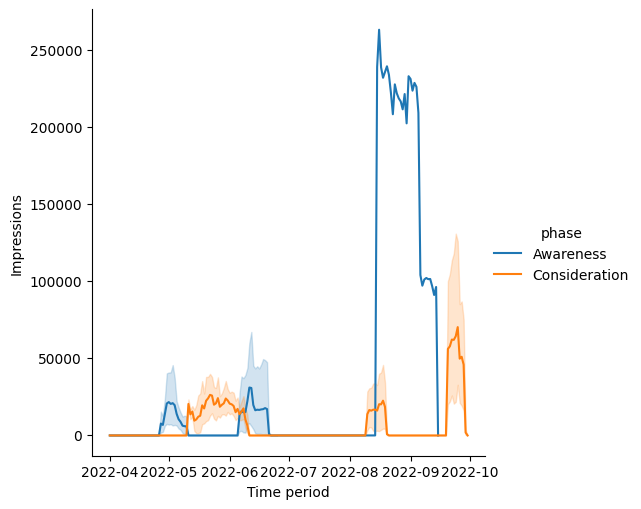

In [64]:
columns=['Spend', 'Clicks', 'Impressions']
for c in columns:
    sns.relplot(x='Time period', y=c, hue='phase', data=df, kind='line')

1. Spend, Clicks, Impressions according to time for total data

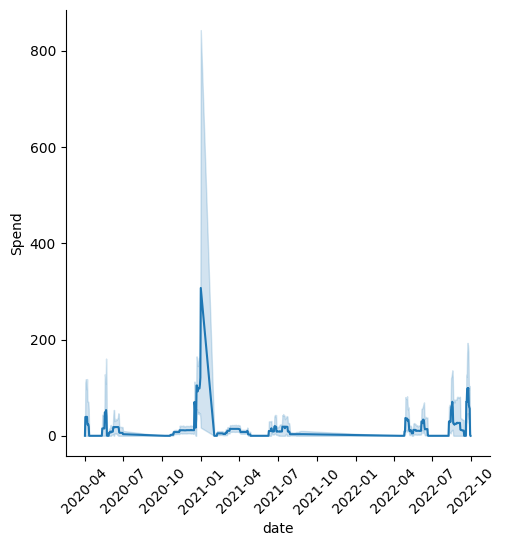

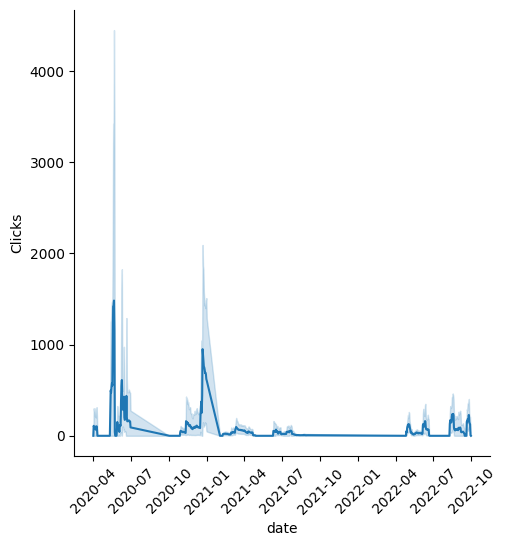

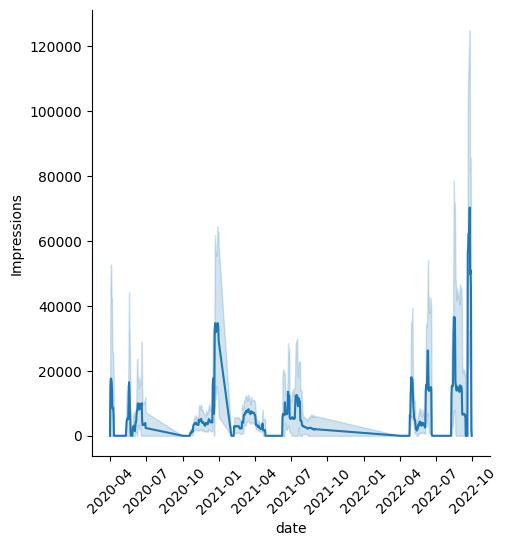

In [65]:
columns=['Spend', 'Clicks', 'Impressions']
for c in columns:
    sns.relplot(x='date', y=c, data=df_concat, kind='line')
    plt.xticks(rotation=45)

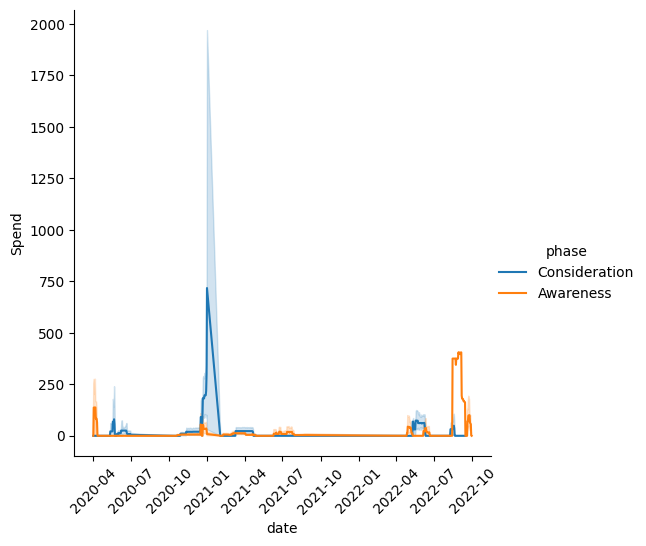

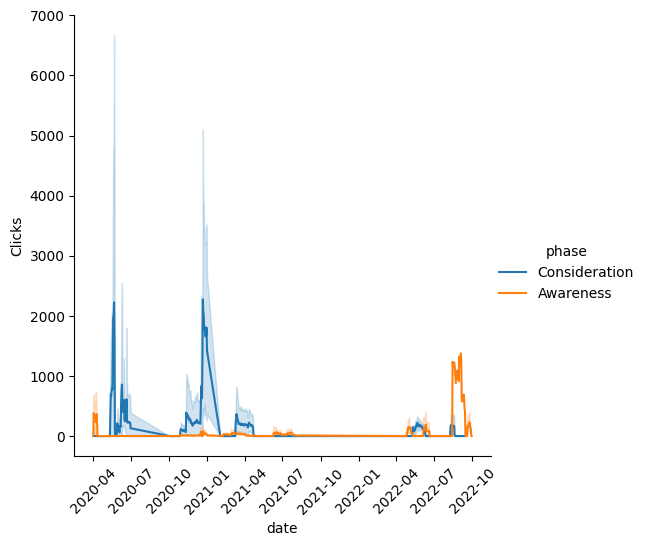

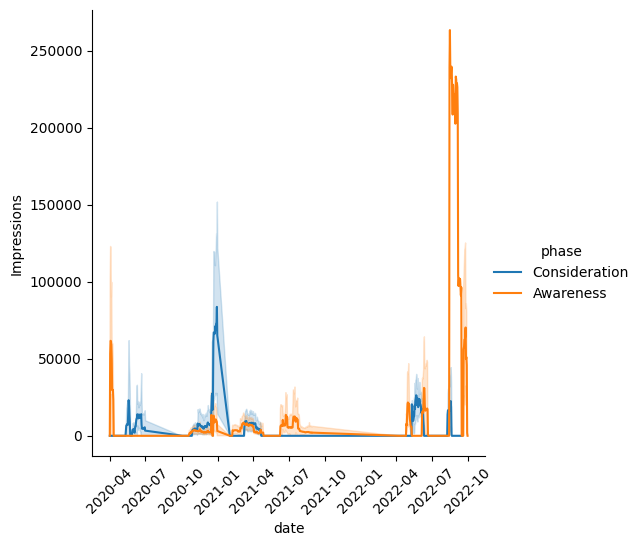

In [66]:
columns=['Spend', 'Clicks', 'Impressions']
for c in columns:
    sns.relplot(x='date', y=c, hue='phase', data=df_concat, kind='line')
    plt.xticks(rotation=45)

In [67]:
#Formatting in weekly format sample

# Group the data by week and calculate the sum of the ad metrics
df_weekly = df.groupby(pd.Grouper(key='Time period', freq='W-SUN')).sum()

# Reset the index to get the 'week' column
df_weekly = df_weekly.reset_index()

# Rename the 'date' column to 'week'
df_weekly = df_weekly.rename(columns={'Time period': 'week_end'})

# Add a 'week_number' column ranging from 1 to 52
df_weekly['week_number'] = df_weekly['week_end'].dt.week

# Display the transformed weekly dataset
df_weekly

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_69575/2137229619.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly = df.groupby(pd.Grouper(key='Time period', freq='W-SUN')).sum()
/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_69575/2137229619.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_weekly['week_number'] = df_weekly['week_end'].dt.week


week_end  Impressions        Spend  Clicks  Tweet engagements  \
0  2022-04-03            0     0.000000       0                  0   
1  2022-04-10            0     0.000000       0                  0   
2  2022-04-17            0     0.000000       0                  0   
3  2022-04-24            0     0.000000       0                  0   
4  2022-05-01      2126101  4599.322099   14378              58009   
5  2022-05-08      3024223  7412.656711   22277              76345   
6  2022-05-15       774229  2207.213196    5678              18554   
7  2022-05-22       809559  2572.864057    6680               9451   
8  2022-05-29       901424  2664.781001    7425              10271   
9  2022-06-05       833704  2592.033700    6320               8458   
10 2022-06-12      4944706  7884.165379   33611             549293   
11 2022-06-19      3995973  3986.177093   19795              45243   
12 2022-06-26       591365   578.839961    2737               3906   
13 2022-07-03            0     0.000000       0                  0   
14 2022-07-10            0     0.000000       0                  0   
15 2022-07-17            0     0.000000       0                  0   
16 2022-07-24            0     0.000000       0                  0   
17 2022-07-31            0     0.000000       0                  0   
18 2022-08-07            0     0.000000       0                  0   
19 2022-08-14      1117571  2220.313014   11282              17638   
20 2022-08-21      3062076  5404.617948   19628              27468   
21 2022-08-28      1528643  2593.923113    7009               8871   
22 2022-09-04      1568097  2809.434197    8324              10703   
23 2022-09-11       817353  1479.114138    5049               6585   
24 2022-09-18       284456   492.528552    1426               1851   
25 2022-09-25      2612111  3729.239765    7607              13009   
26 2022-10-02      1041559  1270.759305    2925               4486   

    Video played 25%  Video played 50%  Video played 75%  Video completions  \
0                  0                 0                 0                  0   
1                  0                 0                 0                  0   
2                  0                 0                 0                  0   
3                  0                 0                 0                  0   
4              56547             13969              5255               2843   
5             107042             27740             10521               5763   
6             182959            104899             65810              44921   
7             378227            225173            144161              99906   
8             409830            237833            149144             101972   
9             379981            216077            133412              89634   
10            942493            527561            333879             231665   
11           2301786           1313298            857851             608121   
12            352513            201610            132727              94654   
13                 0                 0                 0                  0   
14                 0                 0                 0                  0   
15                 0                 0                 0                  0   
16                 0                 0                 0                  0   
17                 0                 0                 0                  0   
18                 0                 0                 0                  0   
19             69124             22077             10037               4581   
20            811667            401501            228925             145061   
21            635732            320832            183995             116833   
22            632189            323333            188089             120786   
23            335136            172330            100873              64979   
24            113361             58120             34229             

## Format the final DS

In [68]:
#Formatting in weekly format total data

# Group the data by week and calculate the sum of the ad metrics
df_concat_weekly = df_concat.groupby(pd.Grouper(key='date', freq='W-SUN')).sum()

# Reset the index to get the 'week' column
df_concat_weekly = df_concat_weekly.reset_index()

# Rename the 'date' column to 'week'
df_concat_weekly = df_concat_weekly.rename(columns={'date': 'week_end'})

# Add a 'week_number' column ranging from 1 to 52
df_concat_weekly['week_number'] = df_concat_weekly['week_end'].dt.week

# Display the transformed weekly dataset
df_concat_weekly

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_69575/3256421397.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_concat_weekly = df_concat.groupby(pd.Grouper(key='date', freq='W-SUN')).sum()
/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_69575/3256421397.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_concat_weekly['week_number'] = df_concat_weekly['week_end'].dt.week


week_end  Impressions        Spend  Clicks  phase_Awareness  \
0   2020-04-05       469712  1098.877493    2644               10   
1   2020-04-12       325287   901.122507    3046               14   
2   2020-04-19            0     0.000000       0               14   
3   2020-04-26            0     0.000000       0               14   
4   2020-05-03            0     0.000000       0               14   
..         ...          ...          ...     ...              ...   
126 2022-09-04      1568097  2809.434197    8324                7   
127 2022-09-11       817353  1479.114138    5049                7   
128 2022-09-18       284456   492.528552    1426               25   
129 2022-09-25      2612111  3729.239765    7607               49   
130 2022-10-02      1041559  1270.759305    2925               35   

     phase_Consideration  week_number  
0                     25           14  
1                     35           15  
2                     35           16  
3                     35           17  
4                     35           18  
..                   ...          ...  
126                   98           35  
127                   98           36  
128                   56           37  
129                    0           38  
130                    0           39  

[131 rows x 7 columns]

In [69]:
df_final = df_concat_weekly[['Impressions', 'Clicks', 'Spend', 'week_end', 'week_number']]
df_final = df_final.rename(columns={'Impressions':'impressions_twitter', 'Spend': 'spend_twitter', 'Clicks': 'clicks_twitter'})
df_final

impressions_twitter  clicks_twitter  spend_twitter   week_end  \
0                 469712            2644    1098.877493 2020-04-05   
1                 325287            3046     901.122507 2020-04-12   
2                      0               0       0.000000 2020-04-19   
3                      0               0       0.000000 2020-04-26   
4                      0               0       0.000000 2020-05-03   
..                   ...             ...            ...        ...   
126              1568097            8324    2809.434197 2022-09-04   
127               817353            5049    1479.114138 2022-09-11   
128               284456            1426     492.528552 2022-09-18   
129              2612111            7607    3729.239765 2022-09-25   
130              1041559            2925    1270.759305 2022-10-02   

     week_number  
0             14  
1             15  
2             16  
3             17  
4             18  
..           ...  
126           35  
127           36  
128           37  
129           38  
130           39  

[131 rows x 5 columns]

In [70]:
df_final.to_csv('twitter_final.csv')